In [ ]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# web scrape Wikipedia article on Natural Language Processing
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [ ]:
article_text

'Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics. Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning.\nMajor tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.\nNatural language processing has its roots in the 1950s.[1] Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The pr

In [ ]:
import re



# Remove square brackets and numbers (like [0-9]*) from the text
article_text = re.sub(r'\[.*?\]', '', article_text)

# Replace multiple spaces with a single space
article_text = re.sub(r'\s+', ' ', article_text).strip()

print(article_text)


# remove special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)


Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to information retrieval, knowledge representation and computational linguistics, a subfield of linguistics. Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning. Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation. Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sentence_list = nltk.sent_tokenize(article_text)


In [ ]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [ ]:
sentence_list = nltk.sent_tokenize(article_text)


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1


In [ ]:

word_frequencies

{'Natural': 2,
 'language': 22,
 'processing': 11,
 'NLP': 15,
 'subfield': 2,
 'computer': 2,
 'science': 3,
 'especially': 1,
 'artificial': 4,
 'intelligence': 5,
 'It': 1,
 'primarily': 1,
 'concerned': 1,
 'providing': 1,
 'computers': 1,
 'ability': 1,
 'process': 2,
 'data': 3,
 'encoded': 1,
 'natural': 14,
 'thus': 1,
 'closely': 2,
 'related': 1,
 'information': 1,
 'retrieval': 1,
 'knowledge': 3,
 'representation': 2,
 'computational': 4,
 'linguistics': 10,
 'Typically': 1,
 'collected': 1,
 'text': 3,
 'corpora': 1,
 'using': 3,
 'either': 1,
 'rule': 5,
 'based': 9,
 'statistical': 8,
 'neural': 6,
 'approaches': 6,
 'machine': 6,
 'learning': 7,
 'deep': 2,
 'Major': 1,
 'tasks': 9,
 'speech': 3,
 'recognition': 1,
 'classification': 1,
 'understanding': 3,
 'generation': 2,
 'roots': 1,
 'Already': 1,
 'Alan': 1,
 'Turing': 2,
 'published': 1,
 'article': 1,
 'titled': 1,
 'Computing': 1,
 'Machinery': 1,
 'Intelligence': 1,
 'proposed': 2,
 'called': 1,
 'test': 2,
 '

In [ ]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [ ]:
word_frequencies


{'Natural': 0.09090909090909091,
 'language': 1.0,
 'processing': 0.5,
 'NLP': 0.6818181818181818,
 'subfield': 0.09090909090909091,
 'computer': 0.09090909090909091,
 'science': 0.13636363636363635,
 'especially': 0.045454545454545456,
 'artificial': 0.18181818181818182,
 'intelligence': 0.22727272727272727,
 'It': 0.045454545454545456,
 'primarily': 0.045454545454545456,
 'concerned': 0.045454545454545456,
 'providing': 0.045454545454545456,
 'computers': 0.045454545454545456,
 'ability': 0.045454545454545456,
 'process': 0.09090909090909091,
 'data': 0.13636363636363635,
 'encoded': 0.045454545454545456,
 'natural': 0.6363636363636364,
 'thus': 0.045454545454545456,
 'closely': 0.09090909090909091,
 'related': 0.045454545454545456,
 'information': 0.045454545454545456,
 'retrieval': 0.045454545454545456,
 'knowledge': 0.13636363636363635,
 'representation': 0.09090909090909091,
 'computational': 0.18181818181818182,
 'linguistics': 0.45454545454545453,
 'Typically': 0.04545454545454

<Axes: xlabel='Samples', ylabel='Counts'>

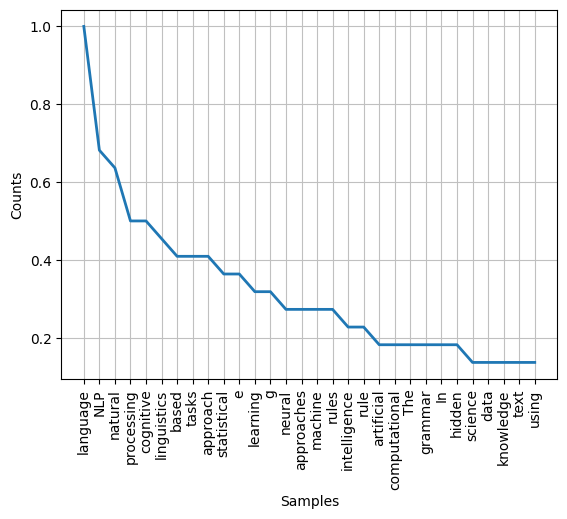

In [ ]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)


In [ ]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [ ]:
sentence_scores

{'Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence.': 2.9090909090909083,
 'Typically data is collected in text corpora, using either rule-based, statistical or neural-based approaches in machine learning and deep learning.': 2.1818181818181817,
 'Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation.': 3.2272727272727266,
 'Natural language processing has its roots in the 1950s.': 2.1818181818181817,
 'The proposed test includes a task that involves the automated interpretation and generation of natural language.': 2.1363636363636367,
 'Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules.': 3.045454545454545,
 'Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processin

In [ ]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [ ]:
summary

'Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. In the 2010s, representation learning and deep neural network-style (featuring many hidden layers) machine learning methods became widespread in natural language processing. That popularity was due partly to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, e.g., in language modeling and parsing. Major tasks in natural language processing are speech recognition, text classification, natural-language understanding, and natural-language generation. Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing. Natural language processing (